In [109]:
#Libraries import
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#Data download using Yahoo Finance
Fticker = ["ES=F"]
Sticker = ["SPY"]
startDate = "2024-01-01"
endDate = dt.datetime.now()
Fdata = yf.download(Fticker, startDate, endDate) ['Close']
Sdata = yf.download(Sticker, startDate, endDate) ['Close']
Fdata.dropna()
Sdata.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2024-01-02,466.663971
2024-01-03,462.852844
2024-01-04,461.362000
2024-01-05,461.993866
2024-01-08,468.589264
...,...
2025-02-13,609.729980
2025-02-14,609.700012
2025-02-18,611.489990


In [111]:
if isinstance(Fdata, pd.Series):
    Fdata = Fdata.to_frame()
if isinstance(Sdata, pd.Series):
    Sdata = Sdata.to_frame()

In [112]:
data_df = Fdata.merge(Sdata, how = 'left', on = 'Date')
corrdata = data_df.corr()

In [113]:
correlation = corrdata.loc['ES=F', 'SPY']
correlation

0.9987420748844726

Text(24.500000000000007, 0.5, "['SPY']")

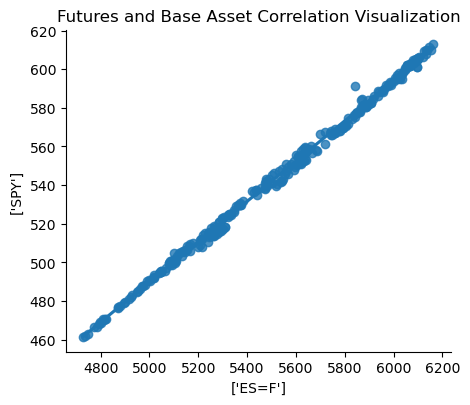

In [114]:
sns.lmplot(data = data_df, x = 'ES=F', y = 'SPY', height = 4, aspect = 1.2);
plt.title("Futures and Base Asset Correlation Visualization")
plt.xlabel(Fticker)
plt.ylabel(Sticker)

In [115]:
#Calculating log returns for Standard deviation calculations
Flogreturns = np.log(Fdata/Fdata.shift(1))
Slogreturns = np.log(Sdata/Sdata.shift(1))

In [116]:
#Calculating Standard Deviations of Futures and Base Asset Returns
Fstd = Flogreturns.std()
Sstd = Slogreturns.std()
Fstd_value = Fstd.iloc[0]
Sstd_value = Sstd.iloc[0]

In [117]:
#Minimum Variance Hedge Ratio Formula = Correlation coefficient * (Standard Deviation of Spot Returns / Standard Deviation of Futures Returns)
hedge_ratio = correlation*(Sstd_value/Fstd_value)
print("The Minimum Variance Hedge Ratio is", hedge_ratio)

The Minimum Variance Hedge Ratio is 0.960706628439775


In [118]:
#Optimal Contract Amount Calculator
#Optimal Amount of Contracts Formula = (Position Size / One Futures Contract Size) * Minimum Variance Hedge Ratio
#Please Select the Position Type of the Base Asset Below (long or short)
position_type = ['long']
position_size = 10000000
futures_size = 306700
contract_amount = (position_size/futures_size)*hedge_ratio

if position_type == ['long']:
    print("The Optimal Amount of Contracts is", -contract_amount)
else:
    print("The Optimal Amount of Contracts is", contract_amount)

The Optimal Amount of Contracts is -31.323985276810397
